In [1]:
import pandas as pandas
import numpy as npp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pytrends.request import TrendReq

u must import plotly and pytrends using pip install

In [2]:
pytrends = TrendReq(hl='en-us', tz=360)
keyword = "cloud computing"

pytrends = trendreq(hl= language, timezone= 360)

keyword = cloud computing

keyword is like name like what u want to search and analysis

In [3]:
pytrends.build_payload([keyword], cat=0, timeframe='today 12-m', geo='', gprop='')

build_payload = Pytrends library that tells Google Trends what kind of data you want to request.

1. keyword = A list of search you want to analyze.

2. cat=0 :- it a category filter = cat, 0 means all category 

3. timeframe = 'today 12-m'(time range for the data  for last 12 months)

4. geo=''( Geographic region, empty means worldwide)  i.e = 'in' -> india, 'us'-> united state

5. gprop = google  property filter  like image , news , youtube , froogle  and ' '  default


Country wise interest

In [4]:
region_data = pytrends.interest_by_region()
region_data = region_data.sort_values(by=keyword, ascending=False).head(15)

C:\Users\mrak5\AppData\Local\Temp\ipykernel_25088\908111996.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




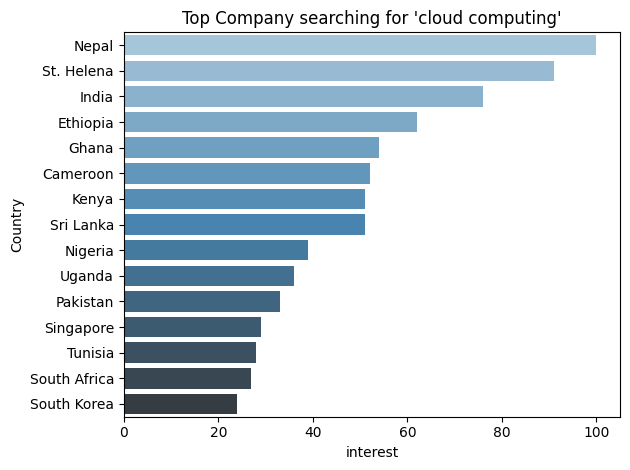

In [6]:
plt.Figure(figsize=(10,6))
sns.barplot(x = region_data[keyword], y=region_data.index, palette= "Blues_d")
plt.title(f"Top Company searching for '{keyword}'")
plt.xlabel('interest')
plt.ylabel("Country")
plt.tight_layout()
plt.show()

World MAP

In [10]:
region_data = region_data.reset_index()
fig = px.choropleth(region_data,
                    locations='geoName',
                    locationmode='country names',
                    color=keyword,
                    title=f"search for interest for '{keyword}' by Country",
                    color_continuous_scale= 'Blues')

fig.show()

C:\Users\mrak5\AppData\Local\Temp\ipykernel_25088\1193230185.py:2: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



TIME-WISE INTEREST

In [11]:
time_df =pytrends.interest_over_time()

C:\Users\mrak5\AppData\Roaming\Python\Python313\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



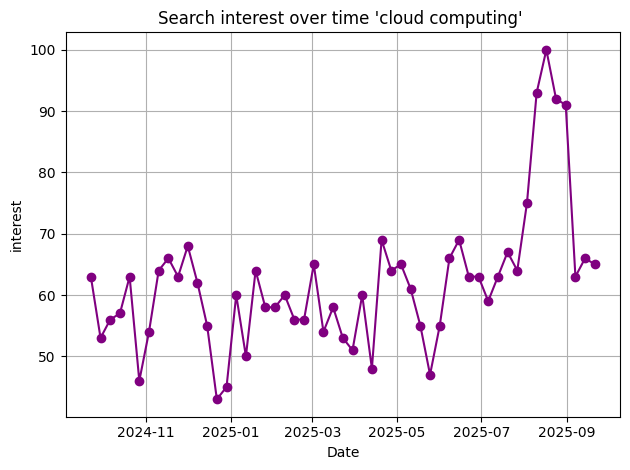

In [13]:
plt.Figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword], marker='o', color='purple')
plt.title(f"Search interest over time '{keyword}' ")
plt.xlabel("Date")
plt.ylabel("interest")
plt.grid(True)
plt.tight_layout()
plt.show()

MULTIPLE KEYWORD COMPARE

In [14]:
kw_list = ["Cloud Computing", "AWS", "Azure", "Google Cloud", "Kubernetes"]
pytrends.build_payload(kw_list, cat=0 , timeframe='today 12-m', geo='' , gprop='')

C:\Users\mrak5\AppData\Roaming\Python\Python313\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



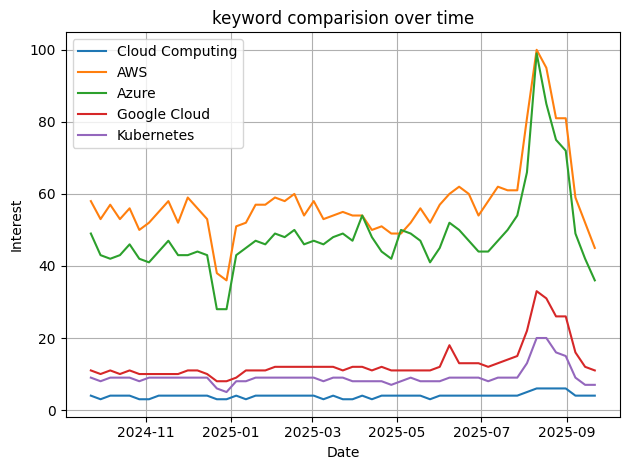

In [15]:
compare_df = pytrends.interest_over_time()
plt.Figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index,compare_df[kw], label=kw)
plt.title("keyword comparision over time")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()